In [1]:
import cv2
from cv2 import aruco as Aruco  # Ensure `aruco` is installed
import numpy as np
import matplotlib.pyplot as plt


# Reading lidar data

In [2]:
from adafruit_rplidar import RPLidar


In [3]:
def get_lidar_data(port='/dev/ttyUSB0', baudrate=115200):
    lidar = RPLidar(None, port)  # Update the port based on your device configuration
    scan = next(lidar.iter_scans(max_buf_meas=500))
    lidar.stop()
    return scan

In [4]:
def process_lidar_data(data):
    data_np = np.array(data)
    data_np[:, 1] = (data_np[:, 1]*np.pi)/180
    x = data_np[:, 2]*np.sin(data_np[:, 1])
    y = data_np[:, 2]*np.cos(data_np[:, 1])
    return x, y    

In [5]:
from tqdm.auto import tqdm

In [7]:
port='/dev/ttyUSB1'
lidar = RPLidar(None, port)  # Update the port based on your device configuration
all_data = []
N = 500
for i, scan in tqdm(enumerate(lidar.iter_scans()), desc="Scanning", total=N):
    if i >= N:
        break
    all_data.extend(scan)
lidar.stop()

Scanning:   0%|          | 0/500 [00:00<?, ?it/s]

In [8]:
np.array(all_data)

array([[ 15.      ,  61.375   , 409.25    ],
       [ 15.      , 356.      , 753.75    ],
       [ 15.      , 357.3125  , 751.75    ],
       ...,
       [ 15.      , 345.84375 , 744.      ],
       [ 12.      , 350.578125, 505.5     ],
       [ 11.      , 351.8125  , 504.25    ]])

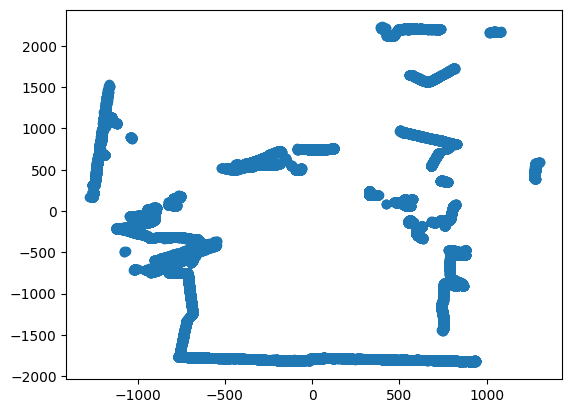

In [9]:
x, y = process_lidar_data(all_data)
plt.scatter(x, y)

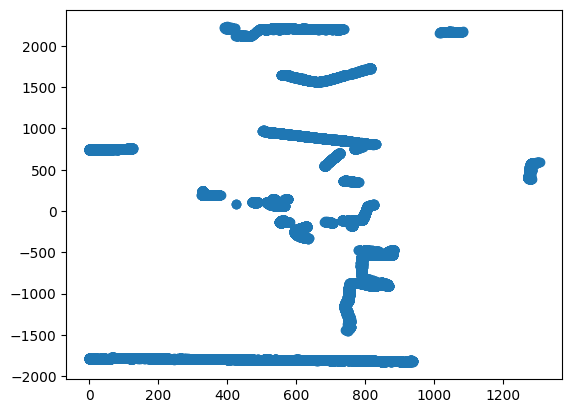

In [10]:
angle_offset = 0
filter_data = [point for point in all_data if 0 <= point[1] <= 180]
filter_data = np.array(filter_data)
filter_data[:, 1] += angle_offset
x, y = process_lidar_data(filter_data)
plt.scatter(x, y)

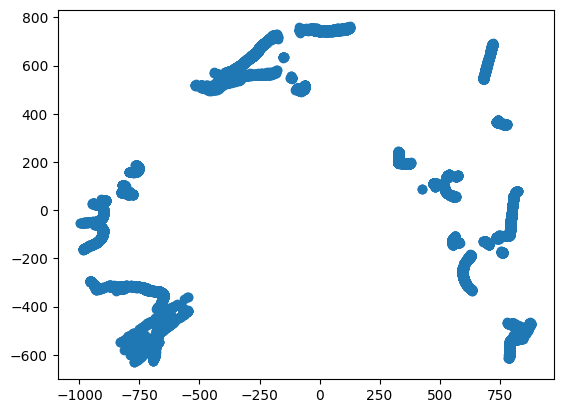

In [11]:
filter_data = [point for point in all_data if point[2] <= 1000]
filter_data = np.array(filter_data)
#filter_data[:, 1] += angle_offset
x, y = process_lidar_data(filter_data)
plt.scatter(x, y)

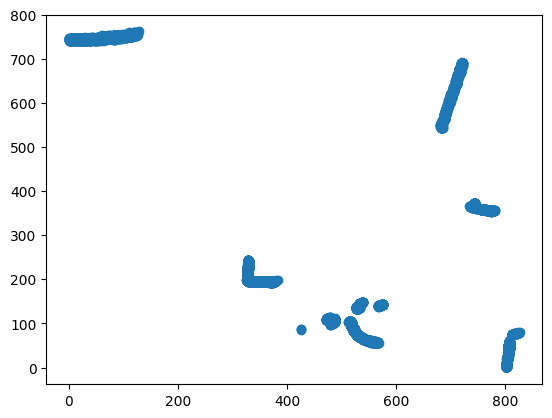

In [12]:
filter_data = [point for point in all_data if point[2] <= 1000 and point[1] < 90]
filter_data = np.array(filter_data)
#filter_data[:, 1] += angle_offset
x, y = process_lidar_data(filter_data)
plt.scatter(x, y)

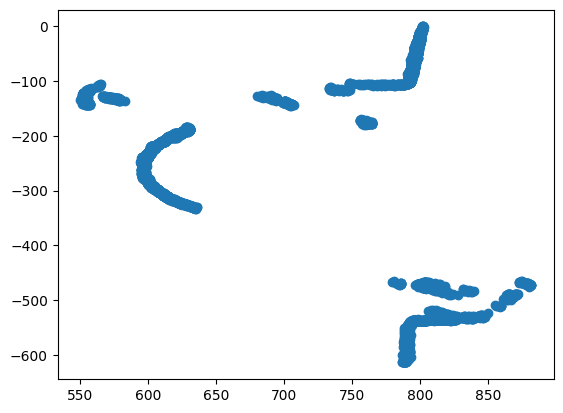

In [13]:
filter_data = [point for point in all_data if point[2] <= 1000 and 90 < point[1] < 180]
filter_data = np.array(filter_data)
filter_data[:, 1] += angle_offset
x, y = process_lidar_data(filter_data)
plt.scatter(x, y)

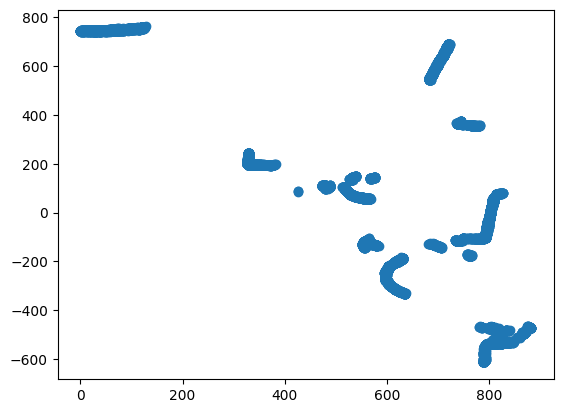

In [14]:
filter_data = [point for point in all_data if point[2] <= 1000 and point[1] < 180]
filter_data = np.array(filter_data)
#filter_data[:, 1] += angle_offset
x, y = process_lidar_data(filter_data)
plt.scatter(x, y)

[ 15.      358.46875 751.5    ] [ 15.     357.3125 751.75  ]


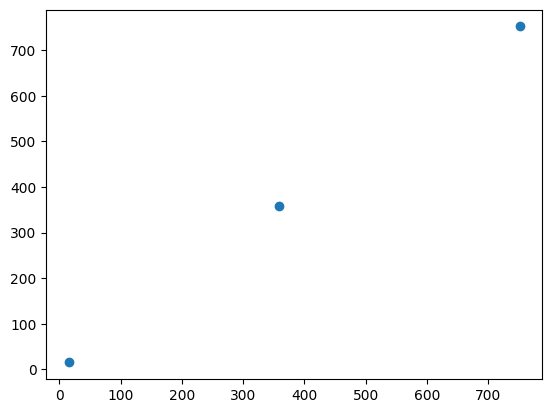

In [18]:
all_data = np.array(all_data)
filter_data = [point for point in all_data if point[2] <= 1000 and 156 < point[1] > 205]
#filter_data = np.array(filter_data)
#filter_data[:, 1] += angle_offset
#x, y = process_lidar_data(filter_data)
x = filter_data[2]
y = filter_data[1]
plt.scatter(x, y)
print(x,y)
#print(filter_data[:3])